In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
# Define path to files
# For MacOS
PATH = "C:\\Users\\nafissaad\\Finance\\Stock List\\"
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2022-02-04"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

In [3]:
stocks_not_downloaded = []
missing_stocks = []

In [4]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 2886 total stocks
tickers.sort()
len(tickers)

893

In [5]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

In [6]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

In [7]:
#port_list = ['GNRC','DXCM','AMD','NFLX','COST','TGT','AES','MSCI','NEM','AMT','HES']

In [8]:
port_list = ["GNRC",'CPRT','ODFL',"AMD", "PAYC","CHTR",
            "MKC", "PG",
            "PGR",'NEM','CCI'
            ]
num_stocks = len(port_list)
num_stocks

11

In [9]:
mult_df = merge_df_by_column_name('Adj Close',  '2018-01-01', 
                                  '2022-02-04', *port_list)
mult_df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
Date,,,,,,,,,,,
2018-01-02,48.029999,43.599998,88.341873,10.980000,80.440002,348.970001,47.579823,80.641121,46.956581,34.176991,95.263092
2018-01-03,49.730000,43.389999,88.433861,11.550000,81.029999,353.029999,47.692631,80.543282,46.931129,33.890396,94.860809
2018-01-04,50.070000,43.740002,88.952980,12.120000,83.110001,349.790009,47.993431,81.112595,46.922638,34.266548,93.758881
2018-01-05,50.410000,43.529999,89.761230,11.880000,83.879997,350.880005,48.463459,81.165970,47.100765,34.391945,94.476028
2018-01-08,49.529999,43.549999,90.654900,12.280000,84.639999,356.549988,48.515163,81.592972,47.244961,34.356113,94.755859
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,291.359985,131.899994,312.429993,128.270004,329.760010,581.299988,96.059998,161.130005,107.629997,64.949997,183.190002
2022-01-20,284.109985,128.399994,306.989990,121.889999,328.269989,572.159973,95.339996,162.000000,107.169998,63.840000,181.649994
2022-01-21,271.160004,126.690002,296.809998,118.809998,310.000000,569.690002,95.709999,162.619995,108.019997,63.090000,182.250000


In [10]:
mult_df/mult_df.iloc[0]

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
Date,,,,,,,,,,,
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-03,1.035395,0.995184,1.001041,1.051913,1.007335,1.011634,1.002371,0.998787,0.999458,0.991614,0.995777
2018-01-04,1.042473,1.003211,1.006918,1.103825,1.033192,1.002350,1.008693,1.005847,0.999277,1.002620,0.984210
2018-01-05,1.049552,0.998395,1.016067,1.081967,1.042765,1.005473,1.018572,1.006508,1.003071,1.006289,0.991738
2018-01-08,1.031230,0.998853,1.026183,1.118397,1.052213,1.021721,1.019658,1.011804,1.006141,1.005241,0.994675
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,6.066208,3.025229,3.536601,11.682150,4.099453,1.665759,2.018923,1.998112,2.292117,1.900401,1.922990
2022-01-20,5.915261,2.944954,3.475022,11.101093,4.080930,1.639568,2.003790,2.008901,2.282321,1.867923,1.906824
2022-01-21,5.645638,2.905734,3.359788,10.820583,3.853804,1.632490,2.011567,2.016589,2.300423,1.845979,1.913123


In [11]:
49.730000/48.029999

1.0353945666332411

In [12]:
50.070000/48.029999

1.0424734757958252

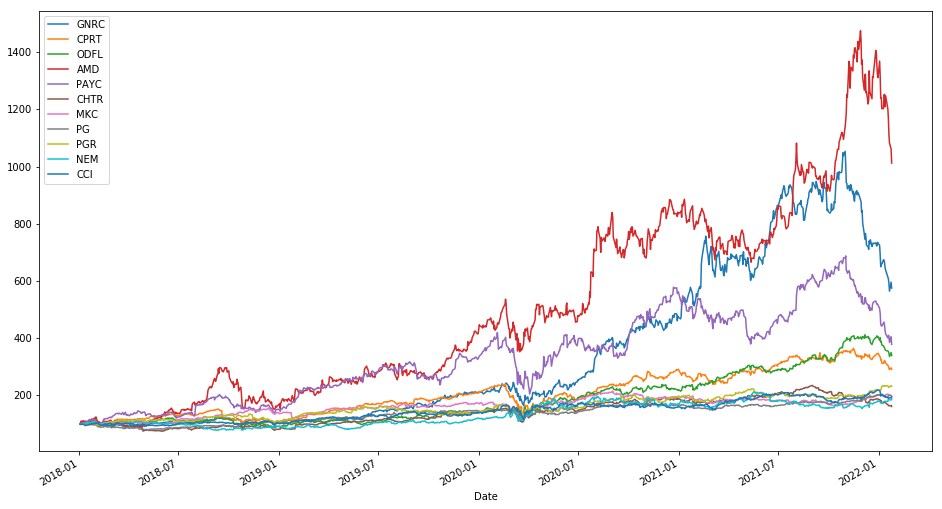

In [13]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))
plt.show()

In [14]:
#Mean Return
returns=np.log(mult_df/mult_df.shift(1))
mean_ret = returns.mean() * 252#252 annual trading days
mean_ret#it could be go up or down by 60%

GNRC    0.431019
CPRT    0.263538
ODFL    0.301136
AMD     0.570172
PAYC    0.328048
CHTR    0.118056
MKC     0.165144
PG      0.168070
PGR     0.208121
NEM     0.151785
CCI     0.159712
dtype: float64

In [15]:
#Returns covariance 
returns.cov()*252

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
GNRC,0.159099,0.059915,0.058104,0.086661,0.088167,0.040792,0.029436,0.025795,0.038117,0.022074,0.041262
CPRT,0.059915,0.097475,0.050601,0.067258,0.084222,0.036823,0.026740,0.024575,0.029365,0.015413,0.033523
ODFL,0.058104,0.050601,0.098081,0.063665,0.062091,0.032967,0.026423,0.022195,0.035285,0.013992,0.030085
AMD,0.086661,0.067258,0.063665,0.305073,0.114230,0.053605,0.031146,0.027964,0.040401,0.029445,0.040893
PAYC,0.088167,0.084222,0.062091,0.114230,0.220489,0.049372,0.037211,0.030485,0.050533,0.019492,0.056496
CHTR,0.040792,0.036823,0.032967,0.053605,0.049372,0.083678,0.022395,0.024152,0.027292,0.014724,0.034052
MKC,0.029436,0.026740,0.026423,0.031146,0.037211,0.022395,0.064181,0.031992,0.028917,0.018393,0.036963
PG,0.025795,0.024575,0.022195,0.027964,0.030485,0.024152,0.031992,0.047254,0.028067,0.012404,0.032187
PGR,0.038117,0.029365,0.035285,0.040401,0.050533,0.027292,0.028917,0.028067,0.070780,0.012854,0.033829
NEM,0.022074,0.015413,0.013992,0.029445,0.019492,0.014724,0.018393,0.012404,0.012854,0.103916,0.019355


In [16]:
returns.corr()

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI
GNRC,1.000000,0.481122,0.465132,0.393360,0.470740,0.353539,0.291299,0.297501,0.359192,0.171674,0.377973
CPRT,0.481122,1.000000,0.517514,0.390025,0.574491,0.407729,0.338078,0.362094,0.353530,0.153143,0.392318
ODFL,0.465132,0.517514,1.000000,0.368050,0.422223,0.363903,0.333028,0.326022,0.423483,0.138593,0.350994
AMD,0.393360,0.390025,0.368050,1.000000,0.440438,0.335503,0.222583,0.232901,0.274941,0.165376,0.270513
PAYC,0.470740,0.574491,0.422223,0.440438,1.000000,0.363478,0.312803,0.298656,0.404507,0.128769,0.439605
CHTR,0.353539,0.407729,0.363903,0.335503,0.363478,1.000000,0.305593,0.384076,0.354631,0.157893,0.430103
MKC,0.291299,0.338078,0.333028,0.222583,0.312803,0.305593,1.000000,0.580920,0.429034,0.225220,0.533092
PG,0.297501,0.362094,0.326022,0.232901,0.298656,0.384076,0.580920,1.000000,0.485316,0.177008,0.541005
PGR,0.359192,0.353530,0.423483,0.274941,0.404507,0.354631,0.429034,0.485316,1.000000,0.149878,0.464591
NEM,0.171674,0.153143,0.138593,0.165376,0.128769,0.157893,0.225220,0.177008,0.149878,1.000000,0.219377


In [17]:
#Generate random weights equal to 1
weights = np.random.random(11)
weights /= np.sum(weights)#Devide weight devided by weights ammount
print('Weights :',weights)
print('Totak Weights :',np.sum(weights))

Weights : [0.07912139 0.11789626 0.05882533 0.07944094 0.13543164 0.01727299
 0.0705036  0.14520402 0.11206738 0.11463524 0.06960122]
Totak Weights : 0.9999999999999999


In [18]:
#Calculate Return of our Portfolio
np.sum(weights*returns.mean())*252

0.2625369747254849

In [19]:
# Calculate volatility or portfolio risk
np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))

0.21630415376747575

In [20]:
#Analyzing Return and risk of 20000 Combitations
risk_free_rate = 0.0125
p_ret = []#Return list
p_vol = []#volatility list
p_SR =[]#sharp ratio best return at lower risk
p_wt =[]#weightings

for x in range(20000):
    # Generate random weights
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.26960008, 0.27168921, 0.23586565, ..., 0.25761119, 0.25676129,
        0.24734464]),
 array([0.20926722, 0.22325485, 0.20441194, ..., 0.21837668, 0.22418099,
        0.21992151]),
 array([1.22857312, 1.16095669, 1.09272311, ..., 1.12242385, 1.08957182,
        1.06785661]),
 array([[0.14535629, 0.04696294, 0.10372849, ..., 0.06791303, 0.20952308,
         0.02961696],
        [0.03040814, 0.1528359 , 0.06259956, ..., 0.13509722, 0.14209963,
         0.04080238],
        [0.13727075, 0.07924567, 0.04251653, ..., 0.15483273, 0.0313636 ,
         0.11115799],
        ...,
        [0.05227019, 0.03373524, 0.07622919, ..., 0.01461172, 0.15446805,
         0.03880504],
        [0.06050867, 0.06884711, 0.04431426, ..., 0.07666149, 0.14529842,
         0.1370591 ],
        [0.1204296 , 0.12707839, 0.01127814, ..., 0.12431501, 0.00792494,
         0.14619118]]))

In [21]:
len(p_ret)

20000

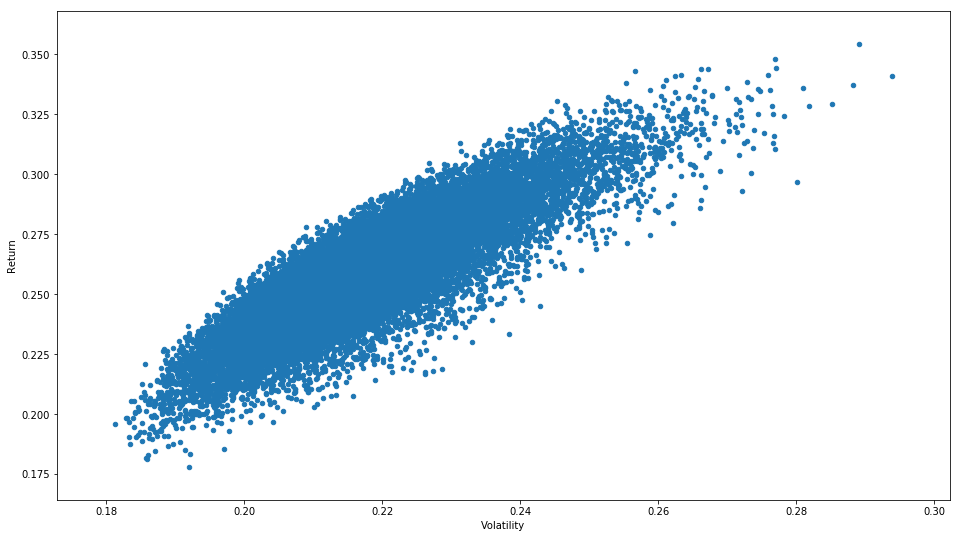

In [22]:
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))
plt.show()

In [23]:
SR_index=np.argmax(p_SR)# which number index has maximum Sarp ratio
i = 0
while i < 11:
    print('Stock : %s : %2.2f' %(port_list[i],(p_wt[SR_index][i]*100)))#port list = stocks tickers, p_weight
    i += 1
print('\nVolatility :',p_vol[SR_index])
print('\nReturn :',p_ret[SR_index])

Stock : GNRC : 18.33
Stock : CPRT : 5.48
Stock : ODFL : 15.04
Stock : AMD : 17.55
Stock : PAYC : 0.83
Stock : CHTR : 2.98
Stock : MKC : 6.06
Stock : PG : 13.77
Stock : PGR : 7.73
Stock : NEM : 11.84
Stock : CCI : 0.41

Volatility : 0.2311767875735979

Return : 0.3128734171457895


In [24]:
26.63+14.69+1.09+1.09+19.19+23.95+1.95+5.12+5.59+0.35+0.35

100.00000000000001

In [25]:
len(p_SR)

20000

In [26]:
SR_index

9363

In [27]:
wt=p_wt[SR_index].tolist()
wt

[0.1832768836555785,
 0.05481958762681458,
 0.1503838297723027,
 0.1755222758256441,
 0.00826769726841259,
 0.029776805990486974,
 0.06059450702305213,
 0.13767227221474107,
 0.07725307974144593,
 0.1183723737035876,
 0.004060687177933863]

In [28]:
p_wt[SR_index].sum()

0.9999999999999999

In [29]:
port_list = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", 
             "PG", "PGR", "NEM", "CCI"]

In [30]:
port_df_start = merge_df_by_column_name('Adj Close',  '2020-01-02', 
                                  '2020-01-02', *port_list)
price=port_df_start.values
price

array([[102.01000214,  93.48000336, 127.20014954,  49.09999847,
        271.79998779, 490.42999268,  81.26832581, 116.84966278,
         67.14667511,  40.94464111, 133.36073303]])

In [31]:
price=[102.01000214,  93.48000336, 127.20014954,  49.09999847,
        271.79998779, 490.42999268,  81.26832581, 116.84966278,
         67.14667511,  40.94464111, 133.36073303]

In [49]:
def Stock_cost(il):
    stocks=[]
    cost=[]
    inv_target=[]
    for i in range(0,10):
        inv=il*wt[i]
        #print('inv',inv)
        hs=inv/price[i]
        #print(hs)
        hs=round(hs)
        #print(hs)
        if hs < 1:
            hs=1
        c=hs*price[i]
        #print('cost',c)
        stocks.append(hs)
        cost.append(c)
        inv_target.append(inv)
    return stocks,cost,inv_target

In [55]:
Stock_cost(7000)

([13, 4, 8, 25, 1, 1, 5, 8, 8, 20],
 [1326.13002782,
  373.92001344,
  1017.60119632,
  1227.49996175,
  271.79998779,
  490.42999268,
  406.34162904999994,
  934.79730224,
  537.17340088,
  818.8928222],
 [1282.9381855890497,
  383.7371133877021,
  1052.6868084061189,
  1228.6559307795087,
  57.87388087888813,
  208.43764193340883,
  424.1615491613649,
  963.7059055031875,
  540.7715581901216,
  828.6066159251131])

In [56]:
c=[1282.9381855890497,
  383.7371133877021,
  1052.6868084061189,
  1228.6559307795087,
  57.87388087888813,
  208.43764193340883,
  424.1615491613649,
  963.7059055031875,
  540.7715581901216,
  828.6066159251131]

In [52]:
sum(c)

6971.575189754463

In [59]:
l=[2550.250053405762, 1869.6000671386719, 2801.878051757813, 1276.5999603271484, 271.79998779296875, 490.42999267578125, 327.7214050292969, 118.2088623046875, 341.39949798583984, 1168.7718505859377, 405.90911865234364, 115.7245979309082]

In [60]:
sum(l)

11738.293445587158